<a href="https://colab.research.google.com/github/donavansousa/modelo-de-regress-o-para-marketing/blob/main/desafio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports e Carregamento do arquivo MKT.csv

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('MKT.csv')



Análise Descritiva

In [28]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Análise Exploratória

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [30]:
display(df)


,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [31]:
df.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

<Axes: >

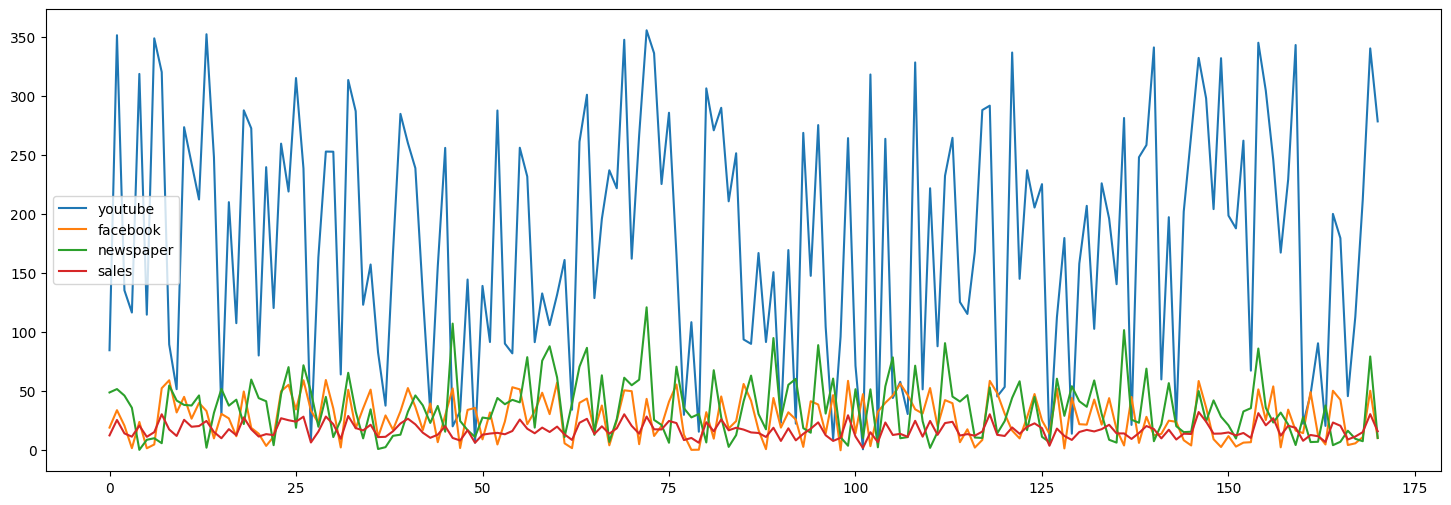

In [32]:
df.plot(kind="line", figsize=(18,6))

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


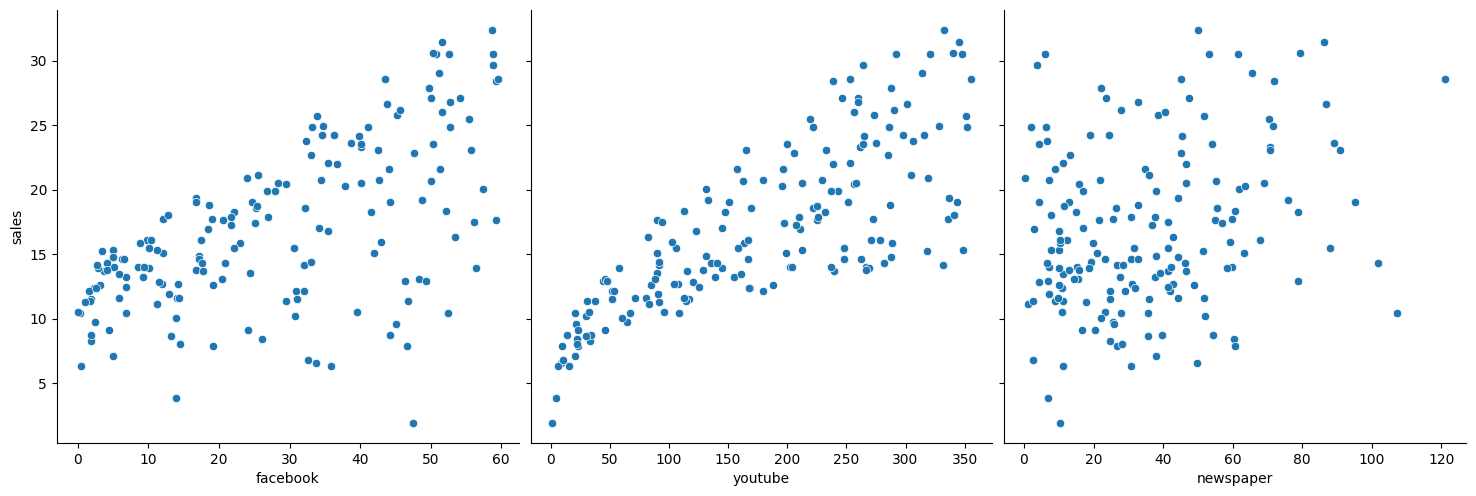

In [33]:
sns.pairplot(df, x_vars=['facebook','youtube','newspaper'], y_vars='sales', size=5)


<Axes: >

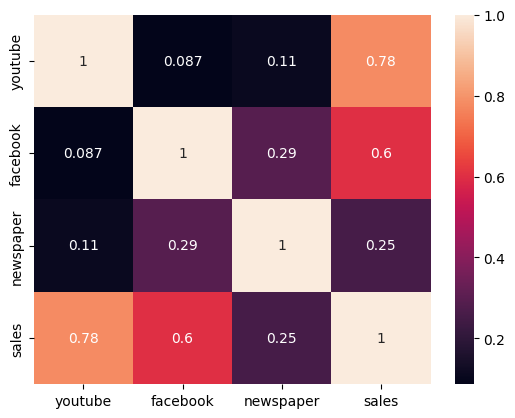

In [34]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='sales', ylabel='Count'>

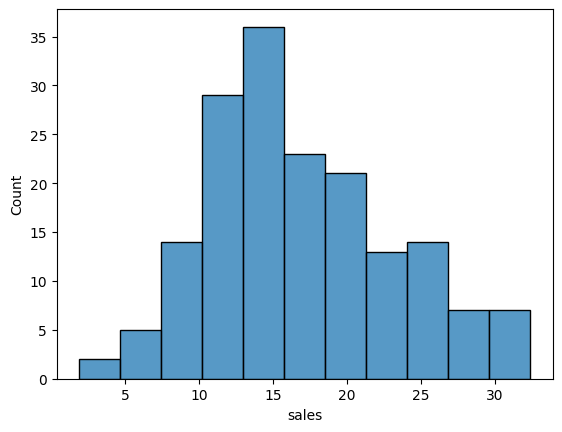

In [35]:
sns.histplot(df['sales'])

Modelagem

In [36]:
X= df[['facebook','youtube','newspaper']]
y= df[['sales']]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.7,test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [37]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

Predição

In [38]:
y_pred = lm.predict(X_test)
r2 = r2_score(Y_test, y_pred)

print("R2 Score:", r2)

R2 Score: 0.882423505618885


Text(0, 0.5, 'Vendas')

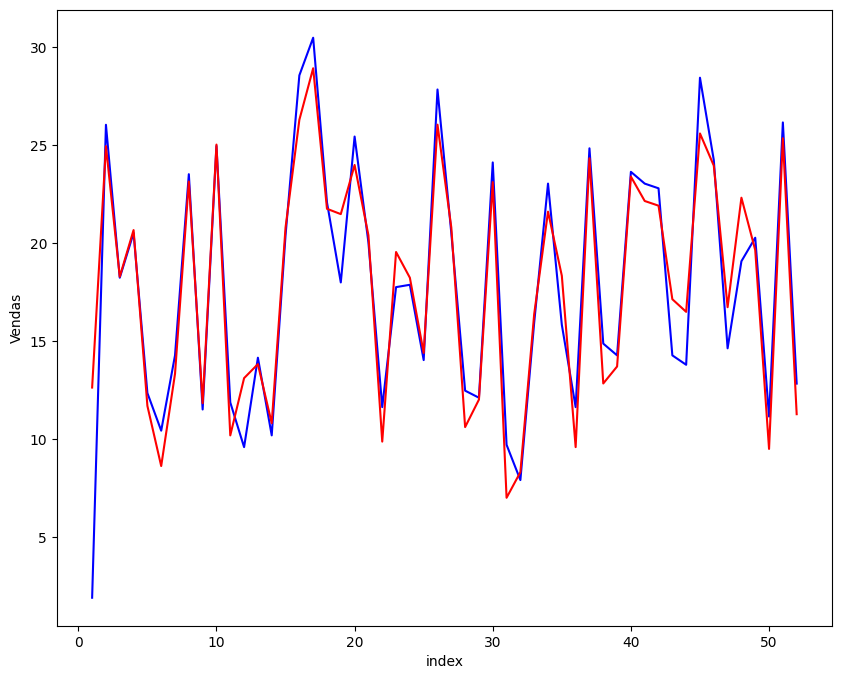

In [39]:
c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, Y_test, color="blue")
plt.plot(c, y_pred, color = "red")
plt.xlabel("index")
plt.ylabel("Vendas")